## 100DayOfMachineLearningCode

## Day_3 (Digit Recognition using Classification Model of ML)

### Implemented on sklearn digits dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
data_digit= load_digits()  #load the digit data

In [4]:
print(data_digit)  #information about the digit data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [5]:
data= data_digit.data  #assign only features element

In [6]:
target= data_digit.target   #assign target

In [7]:
data[0] #checkout the features of first example

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
target[:5]  #checkout the target of top 5 examples

array([0, 1, 2, 3, 4])

In [9]:
data.shape #checkout the shape of the dataset

(1797, 64)

In [10]:
target.shape

(1797,)

<b> The data is based on the digit recognition. Each digit contains 64 features set and image breaks into pixel of dimensions (8,8). To show the image of different digit present we have to first reshape the features data into (8,8) dimensions. <br>
    <i>Example below: - </i></b>

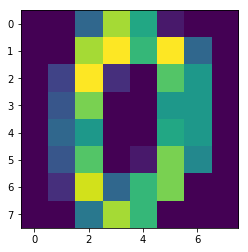

In [11]:
#first reshape the data in (8*8) dimension then show the image
plt.imshow(data[0].reshape(8,8))

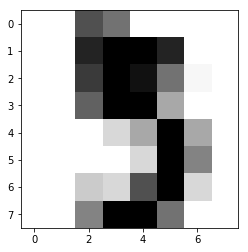

In [12]:
plt.imshow(data[5].reshape(8,8), cmap= 'Greys')

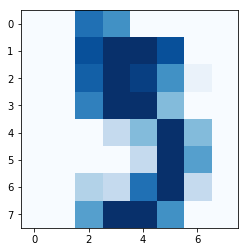

In [13]:
plt.imshow(data[5].reshape(8,8), cmap= 'Blues')

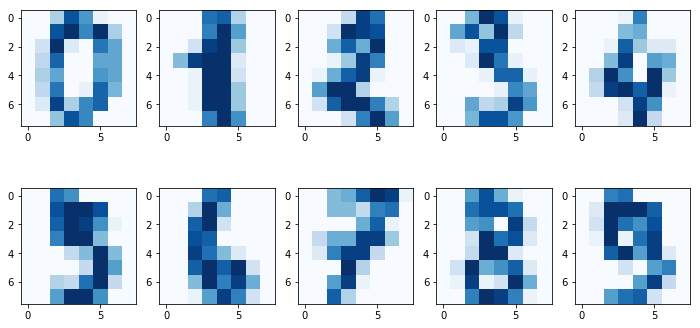

In [14]:
#top ten digit image of digit dataset
plt.figure(figsize= (12, 6))
for i, j in zip(range(0, 10),range(1, 11)):
    plt.subplot(2, 5, j)
    plt.imshow(data[i].reshape(8,8), cmap= 'Blues')

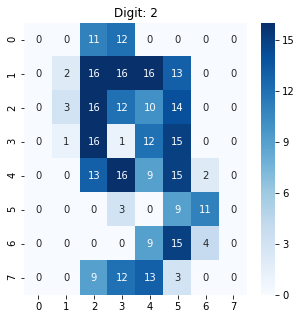

In [15]:
#now plot using heatmap and annotate the pixels
plt.figure(figsize= (5,5))
sns.heatmap(data[9].reshape(8,8), cmap= 'Blues', annot= True)
plt.title('Digit: 2')
plt.show()

<b> The above figure showed how the pixel is distributed. It is (8*8) image thats why the range of xlabel and ylabel as (0-7), the range of pixel is (0-15) we can say that pixel is distributed in 16 parts.</b>

<b> The above data is already preprocessed we have nothing to do any king of peprocessing. Now the time to implement the machine learning model. </b>

### ML modeling

In [16]:
clf_log= LogisticRegression()
clf_dt= DecisionTreeClassifier()
clf_svm= LinearSVC()
clf_knn= KNeighborsClassifier()
clf_nb= GaussianNB()
clf_rf= RandomForestClassifier()
clf_gb= GradientBoostingClassifier()
clf_extratree= ExtraTreesClassifier()

In [17]:
classifier= [('LogisticRegression', clf_log), ('DecisionTree', clf_dt), ('LinearSVC', clf_svm), ('KNeighbors', clf_knn),
             ('GaussianNb', clf_nb), ('RandomForest', clf_rf), ('GradientBoosting', clf_gb), ('ExtraTreeClf', clf_extratree)]

In [18]:
#templates for the machine learning modeling
def ml_template(classifier, train, target):
    acc_train= []
    acc_test= []
    name= []
    #split the data in train and test set
    X_train, X_test, y_train, y_test= train_test_split(train, target, random_state= 1)
    
    #fit the data in the model
    for model in classifier:
        model[1].fit(X_train, y_train)
    
        #do prediction
        prediction= model[1].predict(X_test)
    
        #find the train and testing accuracy
        acc_train_= model[1].score(X_train, y_train)
        acc_test_= accuracy_score(y_test, prediction)
        
        acc_train.append(acc_train_)
        acc_test.append(acc_test_)
        
        name.append(model[0])
    
    #create df of accuracy score of traininga and testing data
    df= pd.DataFrame({
        'Name': name,
        'Accuracy_train': acc_train,
        'Accuracy_test': acc_test
    })
    
    return df

In [19]:
df_result= ml_template(classifier, data, target)

In [20]:
df_result

,Accuracy_test,Accuracy_train,Name
0,0.964444,0.994803,LogisticRegression
1,0.857778,1.000000,DecisionTree
2,0.957778,0.991091,LinearSVC
3,0.993333,0.986637,KNeighbors
4,0.853333,0.873794,GaussianNb
5,0.951111,1.000000,RandomForest
6,0.955556,1.000000,GradientBoosting
7,0.964444,1.000000,ExtraTreeClf


#### The above dataframe shows the accuracy gained by different algirithms.

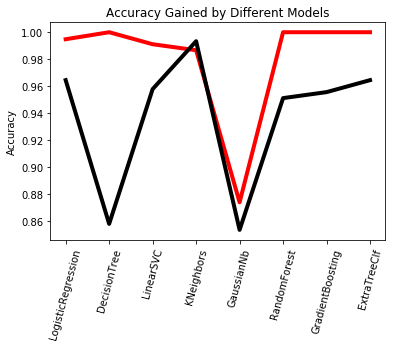

In [21]:
#plotting of the accuracy
x= [0, 1, 2, 3, 4, 5, 6, 7]
label= ['LogisticRegression', 'DecisionTree', 'LinearSVC', 'KNeighbors', 'GaussianNb', 'RandomForest',
            'GradientBoosting', 'ExtraTreeClf']
plt.plot(df_result['Accuracy_train'], 'r-', lw= 4.0, label= 'Train Accuracy')
plt.plot(df_result['Accuracy_test'], 'k-', lw= 4.0, label= 'Test Accuracy')
plt.xticks(x, label, rotation= 75)
plt.title('Accuracy Gained by Different Models')
plt.ylabel('Accuracy')
plt.show()

### The plot visually shows how the accuracy from different model varies.
### For the VotingClassifier I chose all the model and finally find the accuracy (train and test)

In [22]:
#VotingClassifier
clf_vote= VotingClassifier(classifier)

X_train, X_test, y_train, y_test= train_test_split(data, target, random_state= 1)

#fit the data in model
clf_vote.fit(X_train, y_train)

#prediction
prediction= clf_vote.predict(X_test)

print('Training Accuracy: {}' .format(clf_vote.score(X_train, y_train)))
print('Testing Accuracy: {}' .format(accuracy_score(y_test, prediction)))

C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Accuracy: 0.9985152190051967
Testing Accuracy: 0.98


C:\Users\sngupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<b> After all I got the testing accuracy of 98%, which is quite significant and the it eliminates the case of overfitting because the gap between training and testing accuracy is very little.</b>